In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [3]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv(r'C:\Users\perma\Documents\GitHub\houseprice\train.csv',index_col=0)
test = pd.read_csv(r'C:\Users\perma\Documents\GitHub\houseprice\test.csv',index_col=0)

In [4]:
#quick peek over top five records
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#check the number of features and samples
print("The train data size feature is : {} ".format(train.shape))
print("The test data size  feature is : {} ".format(test.shape))

The train data size feature is : (1460, 80) 
The test data size  feature is : (1459, 79) 


#GrLivArea_Outliers

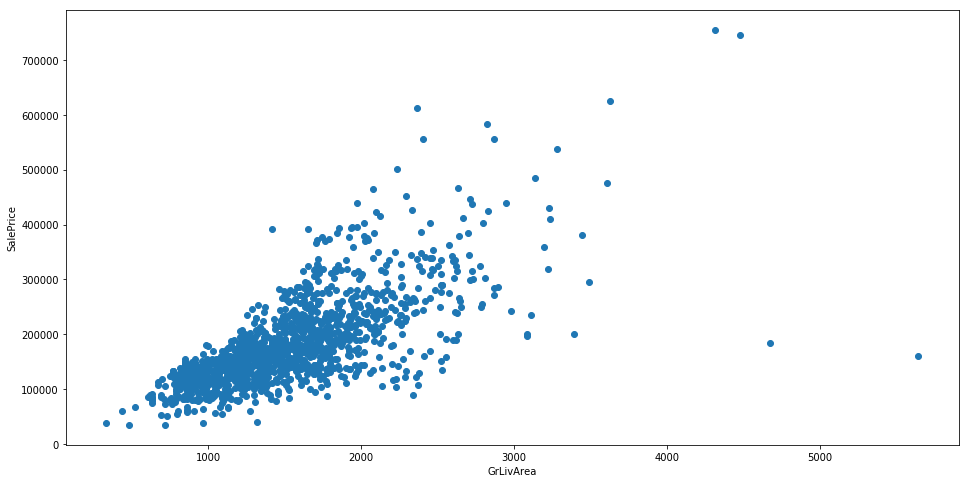

In [7]:
f=plt.figure(figsize=(16,8))
ax=f.add_subplot(111)
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [11]:
#get index of outliers
huge_GrLivArea_outliers_index=train[np.logical_and(train['GrLivArea']>4000,train['SalePrice']<300000)].index
high_SalePrice_GrLivArea_outliers_index=train[np.logical_and(train['GrLivArea']>4000,train['SalePrice']>700000)].index

In [18]:
#outliers with huge GrLivArea but low SalePrice
#we inspect some of other features to decide whether it is abnormal
outliers1=train.loc[huge_GrLivArea_outliers_index,['MSZoning','SalePrice','OverallCond','GrLivArea']]
outliers1

,MSZoning,SalePrice,OverallCond,GrLivArea
Id,,,,
524,RL,184750,5,4676
1299,RL,160000,5,5642


In [19]:
#outliers with huge GrLivArea but extremely high SalePrice
#we inspect some of other features to decide whether it is abnormal
outliers2=train.loc[high_SalePrice_GrLivArea_outliers_index,['MSZoning','SalePrice','OverallCond','GrLivArea']]
outliers2

,MSZoning,SalePrice,OverallCond,GrLivArea
Id,,,,
692,RL,755000,6,4316
1183,RL,745000,5,4476


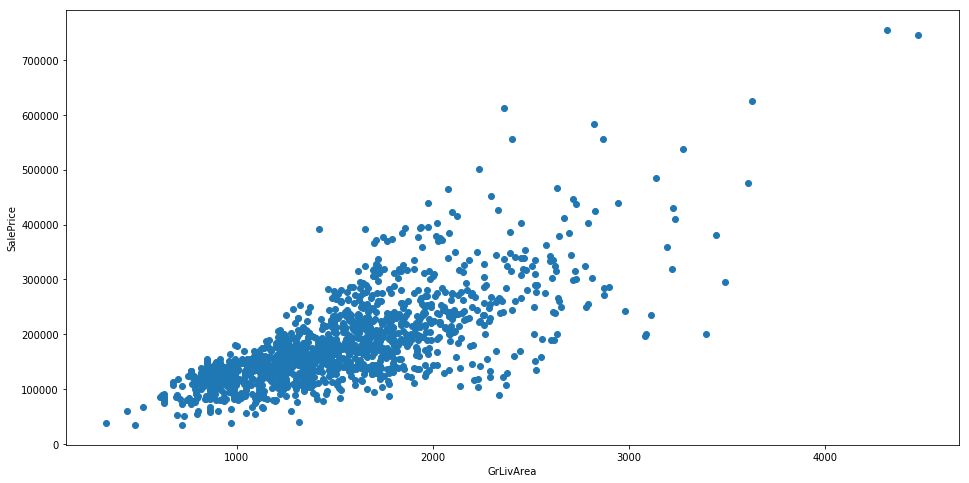

In [22]:
#we'll drop outliers1 and keep outliers2 as normal data
train.drop(huge_GrLivArea_outliers_index,inplace=True)
f=plt.figure(figsize=(16,8))
ax=f.add_subplot(111)
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()
#finally we truely drop them off,and GrLivArea_SalePrice shows linearilty